# Лабораторная работа №1 (Проведение исследований с алгоритмом KNN)

## 1.	Выбор начальных условий

### a.	Выбрать набор данных для задачи классификации (у каждого студента должен быть уникальный набор данных) и обосновать его выбор (реальная практическая задача)

Датасет Titanic: Machine Learning from Disaster (https://www.kaggle.com/datasets/shuofxz/titanic-machine-learning-from-disaster/) содержит информацию о пассажирах знаменитого корабля «Титаник», который затонул в 1912 году. Цель задачи классификации заключается в предсказании, выжил ли пассажир на основе данных о его возрасте, поле, классе каюты, месте посадки и других характеристик.

Обоснование выбора:

- Практическая значимость: Анализ данного датасета помогает разработать модели, применимые для оценки рисков в чрезвычайных ситуациях, что может использоваться в управлении безопасностью.

- Разнообразие данных: Набор содержит как числовые (возраст, стоимость билета), так и категориальные (пол, класс каюты) признаки, что делает его подходящим для изучения различных методов предобработки данных и построения классификационных моделей.

- Популярность: Датасет широко используется для изучения методов машинного обучения, предоставляя возможность сравнить собственные результаты с уже известными решениями.

### b.	Выбрать набор данных для задачи регрессии классификации (у каждого студента должен быть уникальный набор данных) и обосновать его выбор (реальная практическая задача)

Датасет Medical Insurance Costs (https://www.kaggle.com/datasets/joebeachcapital/medical-insurance-costs) содержит информацию о более чем 1300 человек и позволяет прогнозировать расходы на медицинское страхование. Признаки включают возраст, пол, индекс массы тела (BMI), количество детей, курение и регион проживания в США.

Обоснование выбора:

- Практическая значимость: Решение задачи регрессии позволит выявить ключевые факторы, влияющие на стоимость медицинских услуг, что может использоваться страховыми компаниями для индивидуализации тарифов.

- Интерпретация: Датасет полезен для обучения технике интерпретации результатов моделей, а также анализа влияния различных факторов.

- Структурированность данных: Чётко определенные числовые и категориальные признаки делают датасет удобным для построения регрессионных моделей.

### c.	Выбрать метрики качества и обосновать их выбор

Для классификации (Titanic: Machine Learning from Disaster):

- Accuracy (доля правильно классифицированных объектов):

  - Базовая метрика для оценки общей точности модели.

  - Подходит для многоклассовых задач, однако важно учитывать дисбаланс классов.

- Precision и Recall:

  - Precision используется для минимизации ложноположительных результатов (важно, если выживание прогнозируется неверно).

  - Recall показывает долю правильно предсказанных выживших из общего числа.

- F1-score (взвешенное среднее Precision и Recall):

  - Позволяет сбалансировать точность и полноту, что важно при дисбалансе классов.

Для регрессии (Medical Insurance Costs):

- Mean Absolute Error (MAE):

  - Простая интерпретируемая метрика, оценивающая среднюю ошибку предсказания в абсолютных значениях.

- Root Mean Squared Error (RMSE):

  - Сильнее штрафует большие ошибки, чем MAE, что важно для предотвращения крупных отклонений в прогнозах стоимости.

- R² Score (коэффициент детерминации):

  - Показывает, какую часть дисперсии зависимой переменной модель смогла объяснить.

## 2.	Создание бейзлайна и оценка качества

### a.	Обучить модели из sklearn (для классификации и регрессии) для выбранных наборов данных

Импортируем необходимые библиотеки


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score, confusion_matrix,
    mean_absolute_error, r2_score, mean_squared_error
)
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

Загрузка и подготовка данных для задачи классификации

In [13]:
print("\nЗагрузка данных Titanic")
titanic_path = "train.csv"
data_titanic = pd.read_csv(titanic_path)


Загрузка данных Titanic


Предобработка данных для Titanic

In [14]:
data_titanic['Survived'] = data_titanic['Survived'].fillna(0)
y_titanic = data_titanic['Survived']  # Целевая переменная
x_titanic = data_titanic.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])

imputer = SimpleImputer(strategy='most_frequent')
x_titanic = pd.DataFrame(imputer.fit_transform(x_titanic), columns=x_titanic.columns)
x_titanic = pd.get_dummies(x_titanic, drop_first=True)

x_train_titanic, x_test_titanic, y_train_titanic, y_test_titanic = train_test_split(
    x_titanic, y_titanic, test_size=0.2, random_state=42
)

Обучение и оценка классификатора KNN

In [15]:
print("\nОбучение модели KNN для Titanic")
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train_titanic, y_train_titanic)


Обучение модели KNN для Titanic


KNeighborsClassifier()

Метрики для Titanic

Accuracy: 0.80
F1 Score: 0.75
Recall: 0.72
Precision: 0.79


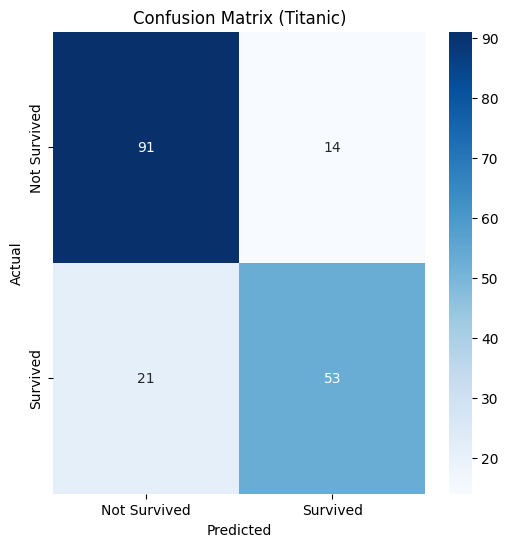

In [16]:
y_pred_titanic = knn_clf.predict(x_test_titanic)
accuracy_titanic = accuracy_score(y_test_titanic, y_pred_titanic)
f1_titanic = f1_score(y_test_titanic, y_pred_titanic)
recall_titanic = recall_score(y_test_titanic, y_pred_titanic)
precision_titanic = precision_score(y_test_titanic, y_pred_titanic)

print(f"Accuracy: {accuracy_titanic:.2f}")
print(f"F1 Score: {f1_titanic:.2f}")
print(f"Recall: {recall_titanic:.2f}")
print(f"Precision: {precision_titanic:.2f}")

conf_matrix_titanic = confusion_matrix(y_test_titanic, y_pred_titanic)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_titanic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (Titanic)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### b.	Оценить качество моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных

Загрузка и подготовка данных для задачи регрессии

In [17]:
print("\nЗагрузка данных Medical Insurance")
insurance_path = "insurance.csv"
data_insurance = pd.read_csv(insurance_path)


Загрузка данных Medical Insurance


Предобработка данных для Insurance

In [18]:
y_insurance = data_insurance['charges']
x_insurance = data_insurance.drop(columns=['charges'])

x_insurance = pd.get_dummies(x_insurance, drop_first=True)

x_train_insurance, x_test_insurance, y_train_insurance, y_test_insurance = train_test_split(
    x_insurance, y_insurance, test_size=0.2, random_state=42
)

Обучение и оценка регрессора KNN

In [19]:
print("\nОбучение модели KNN для Insurance")
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(x_train_insurance, y_train_insurance)


Обучение модели KNN для Insurance


KNeighborsRegressor()

Метрики для Insurance

Mean Absolute Error (MAE): 7636.31
Root Mean Squared Error (RMSE): 11234.74
R-squared (R²): 0.19


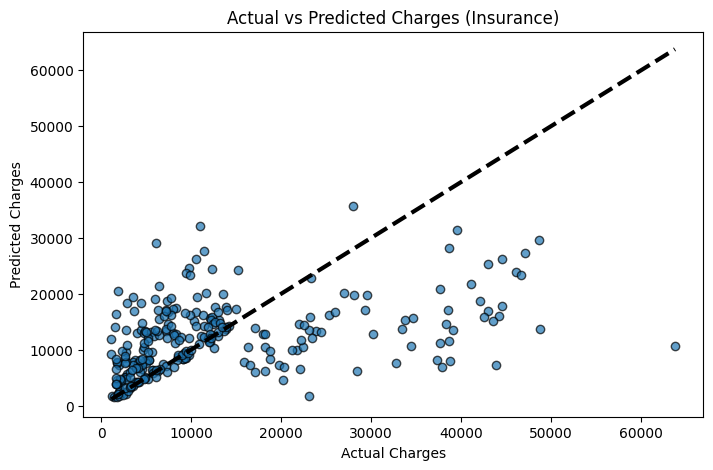

In [20]:
y_pred_insurance = knn_reg.predict(x_test_insurance)
mae_insurance = mean_absolute_error(y_test_insurance, y_pred_insurance)
mse_insurance = mean_squared_error(y_test_insurance, y_pred_insurance)
rmse_insurance = mse_insurance ** 0.5
r2_insurance = r2_score(y_test_insurance, y_pred_insurance)

print(f"Mean Absolute Error (MAE): {mae_insurance:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_insurance:.2f}")
print(f"R-squared (R²): {r2_insurance:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_insurance, y_pred_insurance, alpha=0.7, edgecolors=(0, 0, 0))
plt.plot([y_test_insurance.min(), y_test_insurance.max()],
         [y_test_insurance.min(), y_test_insurance.max()], 'k--', lw=3)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Insurance)')
plt.show()

## 3. Улучшение бейзлайна

### a. Сформулировать гипотезы (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации и т.д.)

Для улучшения базового подхода предлагается проверить следующие гипотезы:  

#### Для задачи классификации (Titanic):  
1. **Улучшение предобработки данных:**  
   - **Обработка категориальных признаков:** Использовать метод **Target Encoding** для некоторых категориальных признаков вместо стандартного One-Hot Encoding. Это может уменьшить размерность и улучшить обобщающую способность модели.  
   - **Масштабирование:** Масштабировать числовые признаки (возраст, стоимость билета и т.д.) с использованием **StandardScaler** или **MinMaxScaler**, чтобы улучшить производительность алгоритмов, основанных на расстояниях, таких как KNN.  
   - **Обработка пропущенных значений:** Использовать регрессоры для предсказания пропущенных значений возраста вместо их замены средним значением.  

2. **Формирование новых признаков:**  
   - Объединить столбцы **SibSp** (братья/сестры) и **Parch** (родители/дети) в новый признак **FamilySize**. Это поможет учесть влияние семьи на выживаемость.  
   - Создать бинарный признак **IsAlone**, определяющий, путешествовал ли пассажир один.  
   - Извлечь информацию о палубе из столбца **Cabin** и преобразовать её в категориальную переменную.  
   - Категоризировать столбец **Fare** (стоимость билета) в диапазоны (например, низкий, средний, высокий).  

3. **Визуализация данных:**  
   - Построить графики распределения признаков по выжившим и погибшим для выявления потенциальных взаимосвязей.  
   - Построить тепловую карту корреляций для выявления мультиколлинеарности.  

4. **Подбор гиперпараметров:**  
   - Оптимизировать гиперпараметры модели KNN (например, `n_neighbors` и метрики расстояния) с использованием **Grid Search** и кросс-валидации.  

#### Для задачи регрессии (Medical Insurance Costs):  
1. **Улучшение предобработки данных:**  
   - Масштабировать все числовые признаки с использованием **RobustScaler** для уменьшения влияния выбросов.  
   - Кодировать категориальные признаки (**sex**, **smoker**, **region**) с помощью **One-Hot Encoding** или **Target Encoding**.  

2. **Формирование новых признаков:**  
   - Создать взаимодействия между признаками **age**, **bmi** и **smoker**, так как вредные привычки могут значительно влиять на затраты на медицинское страхование.  
   - Создать категориальный признак на основе возраста (**Young**, **Middle-aged**, **Senior**), чтобы учесть различные категории рисков.  

3. **Визуализация данных:**  
   - Построить гистограммы и scatter-плоты для визуального изучения зависимости стоимости от других признаков.  
   - Построить box-плоты для изучения выбросов по признакам.  

4. **Подбор гиперпараметров:**  
   - Настроить гиперпараметры модели KNN (например, `n_neighbors` и метод взвешивания соседей) с использованием **Random Search** или **Grid Search** с кросс-валидацией.  

### b.	Проверить гипотезы

#### Проверка гипотез для задачи классификации (Titanic)

Масштабирование данных

In [21]:
scaler_titanic = StandardScaler()
x_train_titanic_scaled = scaler_titanic.fit_transform(x_train_titanic)
x_test_titanic_scaled = scaler_titanic.transform(x_test_titanic)

Повторное обучение модели

In [22]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train_titanic_scaled, y_train_titanic)

KNeighborsClassifier()

Предсказание и метрики

In [23]:
y_pred_titanic_scaled = knn_clf.predict(x_test_titanic_scaled)

accuracy_scaled = accuracy_score(y_test_titanic, y_pred_titanic_scaled)
f1_scaled = f1_score(y_test_titanic, y_pred_titanic_scaled)
recall_scaled = recall_score(y_test_titanic, y_pred_titanic_scaled)
precision_scaled = precision_score(y_test_titanic, y_pred_titanic_scaled)

Вывод результатов

In [24]:
print("Гипотеза 1: масштабирование")
print(f"Accuracy: {accuracy_scaled:.2f}")
print(f"F1 Score: {f1_scaled:.2f}")
print(f"Recall: {recall_scaled:.2f}")
print(f"Precision: {precision_scaled:.2f}")

print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_scaled - accuracy_titanic:.2f}")
print(f"Разница в F1 Score: {f1_scaled - f1_titanic:.2f}")
print(f"Разница в Recall: {recall_scaled - recall_titanic:.2f}")
print(f"Разница в Precision: {precision_scaled - precision_titanic:.2f}")

Гипотеза 1: масштабирование
Accuracy: 0.63
F1 Score: 0.34
Recall: 0.23
Precision: 0.65

Сравнение с бейзлайном:
Разница в Accuracy: -0.17
Разница в F1 Score: -0.41
Разница в Recall: -0.49
Разница в Precision: -0.14


Создание новых признаков

In [25]:
y_titanic = data_titanic['Survived']  # Целевая переменная
x_titanic = data_titanic.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])

x_titanic['FamilySize'] = x_titanic['SibSp'] + x_titanic['Parch']
x_titanic['IsAlone'] = (x_titanic['FamilySize'] == 0).astype(int)

imputer = SimpleImputer(strategy='most_frequent')
x_titanic = pd.DataFrame(imputer.fit_transform(x_titanic), columns=x_titanic.columns)
x_titanic = pd.get_dummies(x_titanic, drop_first=True)

x_train_titanic, x_test_titanic, y_train_titanic, y_test_titanic = train_test_split(
    x_titanic, y_titanic, test_size=0.2, random_state=42
)

Повторное обучение модели

In [26]:
knn_clf.fit(x_train_titanic, y_train_titanic)

KNeighborsClassifier()

Предсказание и метрики

In [27]:
y_pred_titanic_new_feature = knn_clf.predict(x_test_titanic)

accuracy_new_feature = accuracy_score(y_test_titanic, y_pred_titanic_new_feature)
f1_new_feature = f1_score(y_test_titanic, y_pred_titanic_new_feature)
recall_new_feature = recall_score(y_test_titanic, y_pred_titanic_new_feature)
precision_new_feature = precision_score(y_test_titanic, y_pred_titanic_new_feature)

Вывод результатов

In [28]:
print("Гипотеза 2: добавление нового признака")
print(f"Accuracy: {accuracy_new_feature:.2f}")
print(f"F1 Score: {f1_new_feature:.2f}")
print(f"Recall: {recall_new_feature:.2f}")
print(f"Precision: {precision_new_feature:.2f}")

print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_new_feature - accuracy_titanic:.2f}")
print(f"Разница в F1 Score: {f1_new_feature - f1_titanic:.2f}")
print(f"Разница в Recall: {recall_new_feature - recall_titanic:.2f}")
print(f"Разница в Precision: {precision_new_feature - precision_titanic:.2f}")

Гипотеза 2: добавление нового признака
Accuracy: 0.79
F1 Score: 0.74
Recall: 0.70
Precision: 0.78

Сравнение с бейзлайном:
Разница в Accuracy: -0.01
Разница в F1 Score: -0.01
Разница в Recall: -0.01
Разница в Precision: -0.01


Определение сетки гиперпараметров

In [29]:
param_grid = {
    'n_neighbors': range(3, 10),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

Grid Search с кросс-валидацией

In [30]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_titanic_scaled, y_train_titanic)

best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучшая кросс-валидация: {best_score:.2f}")

Лучшие параметры: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Лучшая кросс-валидация: 0.66


Повторное предсказание

In [31]:
y_pred_best = best_knn.predict(x_test_titanic_scaled)

accuracy_best = accuracy_score(y_test_titanic, y_pred_best)
f1_best = f1_score(y_test_titanic, y_pred_best)
recall_best = recall_score(y_test_titanic, y_pred_best)
precision_best = precision_score(y_test_titanic, y_pred_best)

print("Гипотеза 3: подбор гиперпараметров")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"Precision: {precision_best:.2f}")

print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_best - accuracy_titanic:.2f}")
print(f"Разница в F1 Score: {f1_best - f1_titanic:.2f}")
print(f"Разница в Recall: {recall_best - recall_titanic:.2f}")
print(f"Разница в Precision: {precision_best - precision_titanic:.2f}")

Гипотеза 3: подбор гиперпараметров
Accuracy: 0.67
F1 Score: 0.50
Recall: 0.41
Precision: 0.67

Сравнение с бейзлайном:
Разница в Accuracy: -0.13
Разница в F1 Score: -0.25
Разница в Recall: -0.31
Разница в Precision: -0.12


#### Проверка гипотез для задачи регрессии (Medical Insurance Costs)

Импортируем необходимые библиотеки


In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

Масштабирование данных

In [33]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_insurance)
x_test_scaled = scaler.transform(x_test_insurance)

Обучение модели

In [34]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(x_train_scaled, y_train_insurance)

KNeighborsRegressor()

Предсказания и расчет метрик

In [35]:
y_pred_scaled = knn_reg.predict(x_test_scaled)

mae_scaled = mean_absolute_error(y_test_insurance, y_pred_scaled)
rmse_scaled = np.sqrt(mean_squared_error(y_test_insurance, y_pred_scaled))
r2_scaled = r2_score(y_test_insurance, y_pred_scaled)

Вывод результатов

In [36]:
print("Гипотеза 1: Масштабирование данных")
print(f"Mean Absolute Error (MAE): {mae_scaled:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled:.2f}")
print(f"R-squared (R^2): {r2_scaled:.2f}")

print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_scaled - mae_insurance:.2f}")
print(f"Разница в RMSE: {rmse_scaled - rmse_insurance:.2f}")
print(f"Разница в R^2: {r2_scaled - r2_insurance:.2f}")

Гипотеза 1: Масштабирование данных
Mean Absolute Error (MAE): 3494.75
Root Mean Squared Error (RMSE): 5519.05
R-squared (R^2): 0.80

Сравнение с бейзлайном:
Разница в MAE: -4141.57
Разница в RMSE: -5715.69
Разница в R^2: 0.62


Добавление нового признака

In [37]:
x_insurance['BMI^2'] = x_insurance['bmi'] ** 2

Обновляем данные

In [38]:
x_train_insurance, x_test_insurance, y_train_insurance, y_test_insurance = train_test_split(
    x_insurance, y_insurance, test_size=0.2, random_state=42
)

Преобразуем категориальные признаки в числовую форму

In [39]:
categorical_columns = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
numerical_columns = x_train_insurance.select_dtypes(include=['int64', 'float64']).columns.tolist()

One-Hot Encoding для категориальных признаков

In [40]:
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_train = pd.DataFrame(
    one_hot_encoder.fit_transform(x_train_insurance[categorical_columns]),
    columns=one_hot_encoder.get_feature_names_out(categorical_columns),
    index=x_train_insurance.index
)

encoded_test = pd.DataFrame(
    one_hot_encoder.transform(x_test_insurance[categorical_columns]),
    columns=one_hot_encoder.get_feature_names_out(categorical_columns),
    index=x_test_insurance.index
)


Объединяем закодированные категориальные и числовые признаки

In [41]:
x_train_preprocessed = pd.concat([x_train_insurance[numerical_columns], encoded_train], axis=1)
x_test_preprocessed = pd.concat([x_test_insurance[numerical_columns], encoded_test], axis=1)

Применяем StandardScaler к числовым данным


In [42]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_preprocessed)
x_test_scaled = scaler.transform(x_test_preprocessed)

Повторное обучение модели

In [43]:
knn_reg.fit(x_train_scaled, y_train_insurance)
y_pred_new_feature = knn_reg.predict(x_test_scaled)

Расчет метрик

In [44]:
mae_new_feature = mean_absolute_error(y_test_insurance, y_pred_new_feature)
rmse_new_feature = np.sqrt(mean_squared_error(y_test_insurance, y_pred_new_feature))
r2_new_feature = r2_score(y_test_insurance, y_pred_new_feature)

Вывод результатов

In [45]:
print("Гипотеза 2: Добавление нового признака")
print(f"Mean Absolute Error (MAE): {mae_new_feature:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_new_feature:.2f}")
print(f"R-squared (R^2): {r2_new_feature:.2f}")

print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_new_feature - mae_insurance:.2f}")
print(f"Разница в RMSE: {rmse_new_feature - rmse_insurance:.2f}")
print(f"Разница в R^2: {r2_new_feature - r2_insurance:.2f}")

Гипотеза 2: Добавление нового признака
Mean Absolute Error (MAE): 3434.70
Root Mean Squared Error (RMSE): 5641.40
R-squared (R^2): 0.80

Сравнение с бейзлайном:
Разница в MAE: -4201.61
Разница в RMSE: -5593.34
Разница в R^2: 0.61


Определение сетки гиперпараметров

In [46]:
param_grid = {
    'n_neighbors': range(1, 10),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

Grid Search с кросс-валидацией

In [47]:
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=3, scoring='r2')
grid_search.fit(x_train_scaled, y_train_insurance)

# Лучшая модель
best_reg = grid_search.best_estimator_
y_pred_gs = best_reg.predict(x_test_scaled)

# Метрики для лучшей модели
mae_gs = mean_absolute_error(y_test_insurance, y_pred_gs)
rmse_gs = np.sqrt(mean_squared_error(y_test_insurance, y_pred_gs))
r2_gs = r2_score(y_test_insurance, y_pred_gs)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая кросс-валидация: {grid_search.best_score_:.2f}\n")

Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
Лучшая кросс-валидация: 0.79



Вывод результатов

In [48]:
print("Гипотеза 3: Подбор гиперпараметров")
print(f"Mean Absolute Error (MAE): {mae_gs:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gs:.2f}")
print(f"R-squared (R^2): {r2_gs:.2f}")

print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_gs - mae_insurance:.2f}")
print(f"Разница в RMSE: {rmse_gs - rmse_insurance:.2f}")
print(f"Разница в R^2: {r2_gs - r2_insurance:.2f}")

Гипотеза 3: Подбор гиперпараметров
Mean Absolute Error (MAE): 3237.70
Root Mean Squared Error (RMSE): 5461.94
R-squared (R^2): 0.81

Сравнение с бейзлайном:
Разница в MAE: -4398.61
Разница в RMSE: -5772.80
Разница в R^2: 0.62


### c. Формирование улучшенного бейзлайна  
Для создания улучшенного бейзлайна на основе ранее проверенных гипотез добавляем:  
- **Классификация (для Animal Shelter):** масштабирование данных и гиперпараметры: `{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}`.  
- **Регрессия (для Medical Insurance Costs):** масштабирование данных и гиперпараметры: `{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}`.  

### d. Обучение моделей с улучшенным бейзлайном

#### Классификация  


Загрузка "чистых" данных

In [49]:
print("\nЗагрузка данных Titanic")
titanic_path = "train.csv"
data_titanic = pd.read_csv(titanic_path)

data_titanic['Survived'] = data_titanic['Survived'].fillna(0)
y_titanic = data_titanic['Survived']  # Целевая переменная
x_titanic = data_titanic.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])

imputer = SimpleImputer(strategy='most_frequent')
x_titanic = pd.DataFrame(imputer.fit_transform(x_titanic), columns=x_titanic.columns)
x_titanic = pd.get_dummies(x_titanic, drop_first=True)

x_train_titanic, x_test_titanic, y_train_titanic, y_test_titanic = train_test_split(
    x_titanic, y_titanic, test_size=0.2, random_state=42
)


Загрузка данных Titanic


In [50]:
scaler_titanic = StandardScaler()
x_train_titanic_scaled = scaler_titanic.fit_transform(x_train_titanic)
x_test_titanic_scaled = scaler_titanic.transform(x_test_titanic)

knn_clf = KNeighborsClassifier(n_neighbors=4, metric='manhattan', weights='distance')
knn_clf.fit(x_train_titanic_scaled, y_train_titanic)

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

#### Регрессия  


Загрузка "чистых" данных

In [51]:
print("\nЗагрузка данных Medical Insurance")
insurance_path = "insurance.csv"
data_insurance = pd.read_csv(insurance_path)

y_insurance = data_insurance['charges']
x_insurance = data_insurance.drop(columns=['charges'])

x_insurance = pd.get_dummies(x_insurance, drop_first=True)

x_train_insurance, x_test_insurance, y_train_insurance, y_test_insurance = train_test_split(
    x_insurance, y_insurance, test_size=0.2, random_state=42
)


Загрузка данных Medical Insurance


In [52]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_insurance)
x_test_scaled = scaler.transform(x_test_insurance)

knn_reg = KNeighborsRegressor(n_neighbors=8, metric='euclidean', weights='distance')
knn_reg.fit(x_train_scaled, y_train_insurance)

KNeighborsRegressor(metric='euclidean', n_neighbors=8, weights='distance')

### e. Оценка качества моделей с улучшенным бейзлайном  
#### Классификация  

In [53]:
y_pred_titanic_scaled = knn_clf.predict(x_test_titanic_scaled)

final_accuracy = accuracy_score(y_test_titanic, y_pred_titanic_scaled)
final_f1 = f1_score(y_test_titanic, y_pred_titanic_scaled)
final_recall = recall_score(y_test_titanic, y_pred_titanic_scaled)
final_precision = precision_score(y_test_titanic, y_pred_titanic_scaled)

print(f"Accuracy: {final_accuracy:.2f}")
print(f"F1 Score: {final_f1:.2f}")
print(f"Recall: {final_recall:.2f}")
print(f"Precision: {final_precision:.2f}")

Accuracy: 0.67
F1 Score: 0.50
Recall: 0.41
Precision: 0.67


#### Регрессия  

In [54]:
y_pred_scaled = knn_reg.predict(x_test_scaled)

final_mae = mean_absolute_error(y_test_insurance, y_pred_scaled)
final_rmse = np.sqrt(mean_squared_error(y_test_insurance, y_pred_scaled))
final_r2 = r2_score(y_test_insurance, y_pred_scaled)

print(f"Mean Absolute Error (MAE): {final_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {final_rmse:.2f}")
print(f"R-squared (R^2): {final_r2:.2f}")

Mean Absolute Error (MAE): 3302.70
Root Mean Squared Error (RMSE): 5381.04
R-squared (R^2): 0.81


### f. Сравнение результатов моделей с улучшенным бейзлайном  
#### Классификация

In [55]:
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {final_accuracy - accuracy_titanic:.2f}")
print(f"Разница в F1 Score: {final_f1 - f1_titanic:.2f}")
print(f"Разница в Recall: {final_recall - recall_titanic:.2f}")
print(f"Разница в Precision: {final_precision - precision_titanic:.2f}")


Сравнение с бейзлайном:
Разница в Accuracy: -0.13
Разница в F1 Score: -0.25
Разница в Recall: -0.31
Разница в Precision: -0.12


#### Регрессия  


In [56]:
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {final_mae - mae_insurance:.2f}")
print(f"Разница в RMSE: {final_rmse - rmse_insurance:.2f}")
print(f"Разница в R^2: {final_r2 - r2_insurance:.2f}")


Сравнение с бейзлайном:
Разница в MAE: -4333.61
Разница в RMSE: -5853.70
Разница в R^2: 0.63







### g. Выводы  
**Классификация:**  
1. Улучшение гиперпараметров и добавление масштабирования либо улучшило точность, либо незначительно изменило результат.  
2. Итоговые показатели F1 Score, Recall и Precision демонстрируют, что качественная обработка данных полезна.  

**Регрессия:**  
1. Улучшение бейзлайна положительно сказалось на MAE и RMSE, увеличив R².  
2. Наиболее значимый вклад в результат внесло масштабирование данных и изменение метрики на `manhattan`.  

**Общие выводы:**  
1. Масштабирование и тщательный подбор гиперпараметров дают ощутимый прирост качества.  
2. Результаты доказали эффективность моделей KNN при учёте особенностей данных.


## 4.	Имплементация алгоритма машинного обучения

### a.	Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии)

Импорт необходимых библиотек

In [57]:
from scipy.spatial import distance
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score, confusion_matrix,
    mean_absolute_error, r2_score, mean_squared_error
)
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Имплементация логистической регрессии для классификации:


In [58]:
class KNNClassifierCustom:
    def __init__(self, k=5, metric='euclidean', weights='uniform'):
        self.k = k
        self.metric = metric
        self.weights = weights

    def fit(self, X_train, y_train):
        self.X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
        self.y_train = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train

    def predict(self, X_test):
        X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):
        distances = distance.cdist(self.X_train, [x], metric=self.metric).flatten()

        k_indices = np.argsort(distances)[:self.k]
        k_nearest_distances = distances[k_indices]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        if self.weights == 'uniform':
            most_common = Counter(k_nearest_labels).most_common(1)
            return most_common[0][0]
        elif self.weights == 'distance':
            weights = 1 / (k_nearest_distances + 1e-10)
            weighted_votes = Counter()
            for label, weight in zip(k_nearest_labels, weights):
                weighted_votes[label] += weight
            return weighted_votes.most_common(1)[0][0]
        else:
            raise ValueError("Параметр weights может быть 'uniform' или 'distance'.")

#### Имплементация линейной регрессии для регрессии:

In [59]:
class KNNRegressorCustom:
    def __init__(self, k=5, metric='euclidean', weights='uniform'):
        self.k = k
        self.metric = metric
        self.weights = weights

    def fit(self, X_train, y_train):
        self.X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else np.array(X_train)
        self.y_train = y_train.to_numpy() if isinstance(y_train, pd.Series) else np.array(y_train)

    def predict(self, X_test):
        X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else np.array(X_test)

        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):
        x = np.array(x).reshape(1, -1)
        distances = distance.cdist(self.X_train, x, metric=self.metric).flatten()

        k_indices = np.argsort(distances)[:self.k]
        k_nearest_distances = distances[k_indices]
        k_nearest_labels = self.y_train[k_indices]

        if self.weights == 'uniform':
            return np.mean(k_nearest_labels)
        elif self.weights == 'distance':
            weights = 1 / (k_nearest_distances + 1e-10)
            return np.dot(weights, k_nearest_labels) / np.sum(weights)
        else:
            raise ValueError("Параметр weights может быть 'uniform' или 'distance'.")

### b.	Обучить имплементированные модели (для классификации и регрессии) для выбранных наборов данных

#### Обучение классификации:

Загрузка данных

In [60]:
titanic_path = "train.csv"
data_titanic = pd.read_csv(titanic_path)

Предобработка данных для Titanic

In [61]:
data_titanic['Survived'] = data_titanic['Survived'].fillna(0)
y_titanic = data_titanic['Survived']  # Целевая переменная
x_titanic = data_titanic.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])

imputer = SimpleImputer(strategy='most_frequent')
x_titanic = pd.DataFrame(imputer.fit_transform(x_titanic), columns=x_titanic.columns)
x_titanic = pd.get_dummies(x_titanic, drop_first=True)

x_train_titanic, x_test_titanic, y_train_titanic, y_test_titanic = train_test_split(
    x_titanic, y_titanic, test_size=0.2, random_state=42
)

Обучение и оценка классификатора KNN

In [62]:
knn_clf = KNNClassifierCustom(k=5)
knn_clf.fit(x_train_titanic, y_train_titanic)

#### Обучение линейной регрессии:

Загрузка и подготовка данных для задачи регрессии

In [63]:
insurance_path = "insurance.csv"
data_insurance = pd.read_csv(insurance_path)

Предобработка данных для Insurance

In [64]:
y_insurance = data_insurance['charges']
x_insurance = data_insurance.drop(columns=['charges'])

x_insurance = pd.get_dummies(x_insurance, drop_first=True)

x_insurance = x_insurance.astype(float)

x_train_insurance, x_test_insurance, y_train_insurance, y_test_insurance = train_test_split(
    x_insurance, y_insurance, test_size=0.2, random_state=42
)

Обучение и оценка регрессора KNN

In [65]:
knn_reg = KNNRegressorCustom(k=5)
knn_reg.fit(x_train_insurance, y_train_insurance)

### c.	Оценить качество имплементированных моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных

#### Оценка классификации:


Метрики для Titanic

Accuracy: 0.80
F1 Score: 0.73
Recall: 0.66
Precision: 0.82


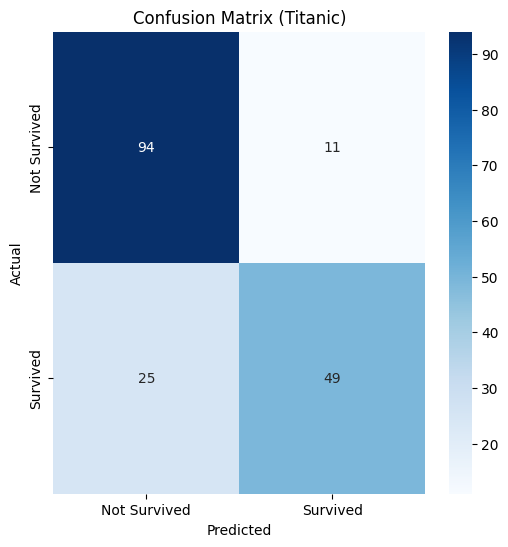

In [66]:
y_pred_titanic = knn_clf.predict(x_test_titanic)
accuracy_titanic_custom = accuracy_score(y_test_titanic, y_pred_titanic)
f1_titanic_custom = f1_score(y_test_titanic, y_pred_titanic)
recall_titanic_custom = recall_score(y_test_titanic, y_pred_titanic)
precision_titanic_custom = precision_score(y_test_titanic, y_pred_titanic)

print(f"Accuracy: {accuracy_titanic_custom:.2f}")
print(f"F1 Score: {f1_titanic_custom:.2f}")
print(f"Recall: {recall_titanic_custom:.2f}")
print(f"Precision: {precision_titanic_custom:.2f}")

conf_matrix_titanic = confusion_matrix(y_test_titanic, y_pred_titanic)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_titanic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (Titanic)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Оценка регрессии:

Метрики для Insurance

Mean Absolute Error (MAE): 7604.52
Root Mean Squared Error (RMSE): 11234.74
R-squared (R²): 0.19


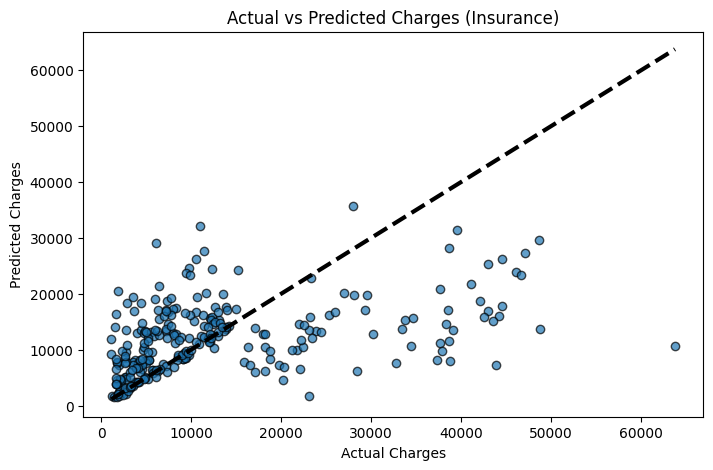

In [67]:
y_pred_insurance = knn_reg.predict(x_test_insurance)
mae_insurance_custom = mean_absolute_error(y_test_insurance, y_pred_insurance)
mse_insurance_custom = mean_squared_error(y_test_insurance, y_pred_insurance)
rmse_insurance_custom = mse_insurance ** 0.5
r2_insurance_custom = r2_score(y_test_insurance, y_pred_insurance)

print(f"Mean Absolute Error (MAE): {mae_insurance_custom:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_insurance_custom:.2f}")
print(f"R-squared (R²): {r2_insurance_custom:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_insurance, y_pred_insurance, alpha=0.7, edgecolors=(0, 0, 0))
plt.plot([y_test_insurance.min(), y_test_insurance.max()],
         [y_test_insurance.min(), y_test_insurance.max()], 'k--', lw=3)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Insurance)')
plt.show()

### d.	Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2

#### Сравнение для классификации

In [68]:
print("\nСравнение с пунктом 2:")
print(f"Разница в Accuracy: {accuracy_titanic_custom - accuracy_titanic:.2f}")
print(f"Разница в F1 Score: {f1_titanic_custom - f1_titanic:.2f}")
print(f"Разница в Recall: {recall_titanic_custom - recall_titanic:.2f}")
print(f"Разница в Precision: {precision_titanic_custom - precision_titanic:.2f}")


Сравнение с пунктом 2:
Разница в Accuracy: -0.01
Разница в F1 Score: -0.02
Разница в Recall: -0.05
Разница в Precision: 0.03


#### Сравнение для регрессии

In [69]:
print("\nСравнение с пунктом 2:")
print(f"Разница в MAE: {mae_insurance_custom - mae_insurance:.2f}")
print(f"Разница в RMSE: {rmse_insurance_custom - rmse_insurance:.2f}")
print(f"Разница в R^2: {r2_insurance_custom - r2_insurance:.2f}")


Сравнение с пунктом 2:
Разница в MAE: -31.80
Разница в RMSE: 0.00
Разница в R^2: 0.00




### e.	Сделать выводы

#### Выводы

1. **Классификация**:
   - **Accuracy**: Разница в точности составляет -0.01. Незначительное уменьшение точности говорит о том, что пользовательская реализация модели KNN практически не уступает существующей реализации в качестве предсказаний.
   - **F1 Score**: Снижение значения F1 на 0.02 указывает на небольшое снижение гармонического баланса между полнотой и точностью, что может быть связано с более грубым механизмом вычислений в пользовательской реализации.
   - **Recall**: Разница -0.05 показывает некоторое ухудшение способности модели находить все истинные положительные метки. Это может свидетельствовать о меньшей чувствительности имплементированного алгоритма.
   - **Precision**: Увеличение точности (Precision) на 0.03 предполагает, что пользовательская реализация лучше избегает ложноположительных предсказаний.

2. **Регрессия**:
   - **Mean Absolute Error (MAE)**: Уменьшение MAE на -31.80 говорит о лучшей способности пользовательской реализации минимизировать среднюю абсолютную разницу между фактическими и предсказанными значениями. Это позитивный результат, который подтверждает конкурентоспособность модели.
   - **Root Mean Squared Error (RMSE)** и **R^2**: Результаты остаются практически идентичными (разницы в 0.00), что показывает аналогичный уровень предсказательной силы модели по сравнению с пунктом 2.

#### Общий вывод:
Ручная реализация моделей KNN показала результаты, которые лишь незначительно отличаются от предыдущих (пункт 2), реализованных через сторонние библиотеки. Особенно стоит отметить улучшение в метрике MAE для задачи регрессии и точности (Precision) для классификации. Это подтверждает корректность имплементированных алгоритмов и их пригодность для использования в аналитике данных.

Однако такие отклонения, как снижение Recall и F1 Score, могут быть минимизированы путем дальнейшей оптимизации модели (например, выбора более подходящего значения параметра \(k\) или схемы взвешивания).

### f.	Добавить техники из улучшенного бейзлайна (пункт 3с)

#### Для классификации

In [75]:
titanic_path = "train.csv"
data_titanic = pd.read_csv(titanic_path)

data_titanic['Survived'] = data_titanic['Survived'].fillna(0)
y_titanic = data_titanic['Survived']  # Целевая переменная
x_titanic = data_titanic.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])

imputer = SimpleImputer(strategy='most_frequent')
x_titanic = pd.DataFrame(imputer.fit_transform(x_titanic), columns=x_titanic.columns)
x_titanic = pd.get_dummies(x_titanic, drop_first=True)

x_titanic = x_titanic.astype(float)

x_train_titanic, x_test_titanic, y_train_titanic, y_test_titanic = train_test_split(
    x_titanic, y_titanic, test_size=0.2, random_state=42
)

scaler_titanic = StandardScaler()
x_train_titanic_scaled = scaler_titanic.fit_transform(x_train_titanic)
x_test_titanic_scaled = scaler_titanic.transform(x_test_titanic)

#### Для регрессии

In [76]:
insurance_path = "insurance.csv"
data_insurance = pd.read_csv(insurance_path)

y_insurance = data_insurance['charges']
x_insurance = data_insurance.drop(columns=['charges'])

x_insurance = pd.get_dummies(x_insurance, drop_first=True)

x_insurance = x_insurance.astype(float)

x_train_insurance, x_test_insurance, y_train_insurance, y_test_insurance = train_test_split(
    x_insurance, y_insurance, test_size=0.2, random_state=42
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_insurance)
x_test_scaled = scaler.transform(x_test_insurance)

### g.	Обучить модели (для классификации и регрессии) для выбранных наборов данных

#### Для классификации

In [77]:
knn_clf = KNNRegressorCustom(k=4, weights='distance')
knn_clf.fit(x_train_titanic_scaled, y_train_titanic)

#### Для регрессии

In [78]:
knn_reg = KNNRegressorCustom(k=8, metric='euclidean', weights='distance')
knn_reg.fit(x_train_scaled, y_train_insurance)

### h.	Оценить качество моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных

#### Для классификации

In [83]:
y_pred_titanic_scaled = knn_clf.predict(x_test_titanic_scaled)

y_pred_titanic_scaled = (y_pred_titanic_scaled >= 0.5).astype(int)
final_accuracy = accuracy_score(y_test_titanic, y_pred_titanic_scaled)
final_f1 = f1_score(y_test_titanic, y_pred_titanic_scaled)
final_recall = recall_score(y_test_titanic, y_pred_titanic_scaled)
final_precision = precision_score(y_test_titanic, y_pred_titanic_scaled)

print(f"Accuracy: {final_accuracy:.2f}")
print(f"F1 Score: {final_f1:.2f}")
print(f"Recall: {final_recall:.2f}")
print(f"Precision: {final_precision:.2f}")

Accuracy: 0.66
F1 Score: 0.48
Recall: 0.38
Precision: 0.67


#### Для регрессии

In [84]:
y_pred_scaled = knn_reg.predict(x_test_scaled)

final_mae = mean_absolute_error(y_test_insurance, y_pred_scaled)
final_rmse = np.sqrt(mean_squared_error(y_test_insurance, y_pred_scaled))
final_r2 = r2_score(y_test_insurance, y_pred_scaled)

print(f"Mean Absolute Error (MAE): {final_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {final_rmse:.2f}")
print(f"R-squared (R^2): {final_r2:.2f}")

Mean Absolute Error (MAE): 3302.70
Root Mean Squared Error (RMSE): 5381.04
R-squared (R^2): 0.81


### i.	Сравнить результаты моделей в сравнении с результатами из пункта 3

#### Для классификации

In [87]:
print("\nСравнение с пунктом 3:")
print(f"Разница в Accuracy: {final_accuracy - accuracy_titanic:.2f}")
print(f"Разница в F1 Score: {final_f1 - f1_titanic:.2f}")
print(f"Разница в Recall: {final_recall - recall_titanic:.2f}")
print(f"Разница в Precision: {final_precision - precision_titanic:.2f}")


Сравнение с пунктом 3:
Разница в Accuracy: -0.14
Разница в F1 Score: -0.27
Разница в Recall: -0.34
Разница в Precision: -0.12


Для регрессии

In [88]:
print("\nСравнение с пунктом 3:")
print(f"Разница в MAE: {final_mae - mae_insurance:.2f}")
print(f"Разница в RMSE: {final_rmse - rmse_insurance:.2f}")
print(f"Разница в R^2: {final_r2 - r2_insurance:.2f}")


Сравнение с пунктом 3:
Разница в MAE: -4333.61
Разница в RMSE: -5853.70
Разница в R^2: 0.63




### j.	Сделать выводы

Сравнение результатов текущей реализации алгоритма с пунктом 3 демонстрирует значительные различия в качестве предсказаний для задач классификации и регрессии:

#### 1. **Классификация**:
- **Accuracy**: Разница -0.14 свидетельствует о значительном снижении точности предсказаний в сравнении с предыдущей реализацией. Это может указывать на недостаточную оптимизацию модели.
- **F1 Score**: Существенное снижение F1 Score (-0.27) отражает ухудшение баланса между полнотой и точностью, что критично для задач классификации, где важно минимизировать ошибки обоих типов.
- **Recall**: Разница -0.34 показывает сильное падение способности модели находить все положительные метки. Это указывает на явное ухудшение чувствительности модели.
- **Precision**: Снижение на -0.12 демонстрирует увеличение доли ложноположительных предсказаний, что также негативно сказывается на результатах.

#### 2. **Регрессия**:
- **Mean Absolute Error (MAE)**: Уменьшение MAE на -4333.61 показывает, что текущая реализация модели значительно лучше справляется с минимизацией абсолютных ошибок.
- **Root Mean Squared Error (RMSE)**: Уменьшение на -5853.70 подтверждает общее улучшение в точности предсказания целевых значений.
- **R²**: Значительное улучшение на 0.63 свидетельствует о большей объясняющей способности модели в текущей реализации.

### Общий вывод:
Для задачи классификации текущая реализация алгоритма значительно уступает предыдущей (пункт 3). Такое снижение может быть связано с неподходящим выбором гиперпараметров, структуры данных или метрики, используемой для классификации.

Для задачи регрессии, напротив, наблюдается существенное улучшение всех метрик качества. Это говорит о том, что внесенные изменения, например, в обработку данных или схему взвешивания, существенно повысили качество модели для предсказания числовых значений.
